In [10]:
# Import the kagglehub library, which allows interaction with Kaggle datasets.
import kagglehub
# Download the latest version of the specified dataset from Kaggle.
# The dataset identifier "ahmedashrafahmed/fdata-adni-dataset" refers to a dataset
# uploaded by the user "ahmedashrafahmed" containing ADNI (Alzheimer's Disease Neuroimaging Initiative) data.
path = kagglehub.dataset_download("ahmedashrafahmed/fdata-adni-dataset")
# Print the local path where the dataset files are stored after downloading.
print("Path to dataset files:", path)

Path to dataset files: /home/zuha/.cache/kagglehub/datasets/ahmedashrafahmed/fdata-adni-dataset/versions/1


In [11]:
# Standard library imports
import os  # Provides functions for interacting with the operating system (e.g., file paths, directory management).
# Image processing
import cv2  # OpenCV library for image processing (loading, resizing, and manipulating images).
# Data handling and numerical operations
import pandas as pd  # Pandas for handling tabular data (CSV, Excel, etc.).
import numpy as np  # NumPy for numerical computations, arrays, and matrix operations.
# Data visualization
import matplotlib.pyplot as plt  # Matplotlib for plotting graphs and visualizing data.
import seaborn as sns  # Seaborn for enhanced data visualization (heatmaps, distributions, etc.).
# Machine learning utilities
from sklearn.model_selection import train_test_split  # Splits data into training and testing sets.
from sklearn.preprocessing import LabelEncoder  # Encodes categorical labels as numerical values.
# Data augmentation for image preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Generates augmented images for training.
# Deep learning framework
import keras  # High-level API for building deep learning models with TensorFlow.
from keras.callbacks import EarlyStopping, ModelCheckpoint  # Callbacks to prevent overfitting and save best model.
# TensorFlow (backend for Keras)
import tensorflow as tf  # TensorFlow for deep learning and neural network training.
# Model evaluation
from sklearn.metrics import confusion_matrix  # Creates a confusion matrix for classification results.
from sklearn.metrics import classification_report  # Generates a detailed classification report.
# Progress bar utility
from tqdm import tqdm  # Displays progress bars in loops (useful for tracking long-running processes).
# Handling class imbalance
from imblearn.over_sampling import SMOTE  # Synthetic Minority Over-sampling Technique (SMOTE) to balance dataset.
# Defining a convolutional neural network (CNN)
from tensorflow.keras.models import Sequential  # Defines a sequential model (layer-by-layer).
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout  # CNN layers for feature extraction and classification.

In [12]:
# Initialize empty lists to store image file paths and corresponding labels.
images = []
labels = []
# Loop through each subfolder in the dataset directory.
# tqdm is used to display a progress bar for better visualization of the loop execution.
for subfolder in tqdm(os.listdir('/home/zuha/.cache/kagglehub/datasets/ahmedashrafahmed/fdata-adni-dataset/versions/1')):
    # Construct the full path to the subfolder.
    subfolder_path = os.path.join('/home/zuha/.cache/kagglehub/datasets/ahmedashrafahmed/fdata-adni-dataset/versions/1', subfolder)
    # Loop through each category folder (which likely represents different classes or labels).
    for folder in os.listdir(subfolder_path):
        # Construct the full path to the category folder.
        subfolder_path2 = os.path.join(subfolder_path, folder)
        # Loop through each image file in the category folder.
        for image_filename in os.listdir(subfolder_path2):
            # Construct the full path to the image file.
            image_path = os.path.join(subfolder_path2, image_filename)
            # Append the image path to the images list.
            images.append(image_path)
            # Append the folder name (class label) to the labels list.
            labels.append(folder)
# Create a Pandas DataFrame with two columns: 'image' (file path) and 'label' (class label).
df = pd.DataFrame({'image': images, 'label': labels})
# Display the DataFrame.
df

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 38.20it/s]


image label
0      /home/zuha/.cache/kagglehub/datasets/ahmedashr...  LMCI
1      /home/zuha/.cache/kagglehub/datasets/ahmedashr...  LMCI
2      /home/zuha/.cache/kagglehub/datasets/ahmedashr...  LMCI
3      /home/zuha/.cache/kagglehub/datasets/ahmedashr...  LMCI
4      /home/zuha/.cache/kagglehub/datasets/ahmedashr...  LMCI
...                                                  ...   ...
33979  /home/zuha/.cache/kagglehub/datasets/ahmedashr...  EMCI
33980  /home/zuha/.cache/kagglehub/datasets/ahmedashr...  EMCI
33981  /home/zuha/.cache/kagglehub/datasets/ahmedashr...  EMCI
33982  /home/zuha/.cache/kagglehub/datasets/ahmedashr...  EMCI
33983  /home/zuha/.cache/kagglehub/datasets/ahmedashr...  EMCI

[33984 rows x 2 columns]

/tmp/ipykernel_26032/1212115612.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df.label, palette='Set1')


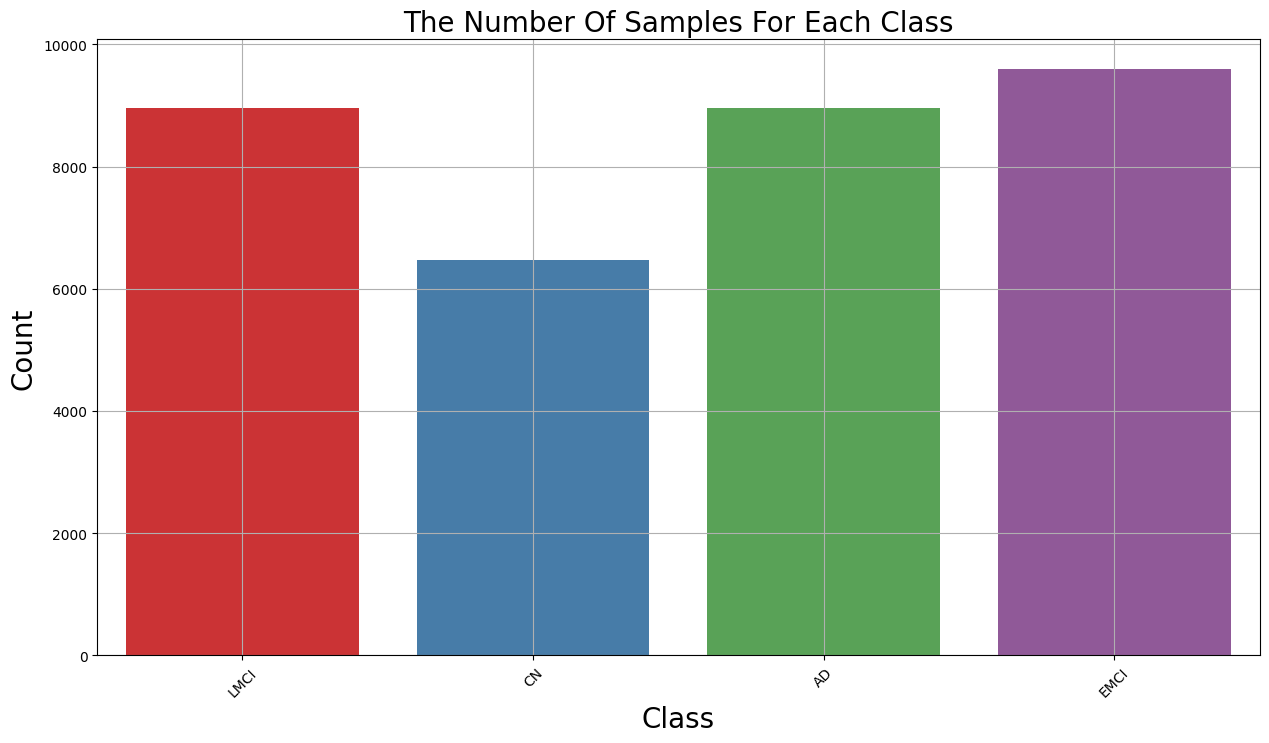

In [13]:
# Set the figure size for better visualization.
plt.figure(figsize=(15, 8))
# Create a count plot to visualize the number of samples per class.
# 'df.label' contains the class labels, and 'Set1' provides a distinct color palette.
ax = sns.countplot(x=df.label, palette='Set1')
# Set the x-axis label with increased font size for readability.
ax.set_xlabel("Class", fontsize=20)
# Set the y-axis label with increased font size for readability.
ax.set_ylabel("Count", fontsize=20)
# Set the title of the plot to describe the visualization.
plt.title('The Number Of Samples For Each Class', fontsize=20)
# Add grid lines to improve readability.
plt.grid(True)
# Rotate x-axis labels by 45 degrees to avoid overlap if class names are long.
plt.xticks(rotation=45)
# Display the plot.
plt.show()

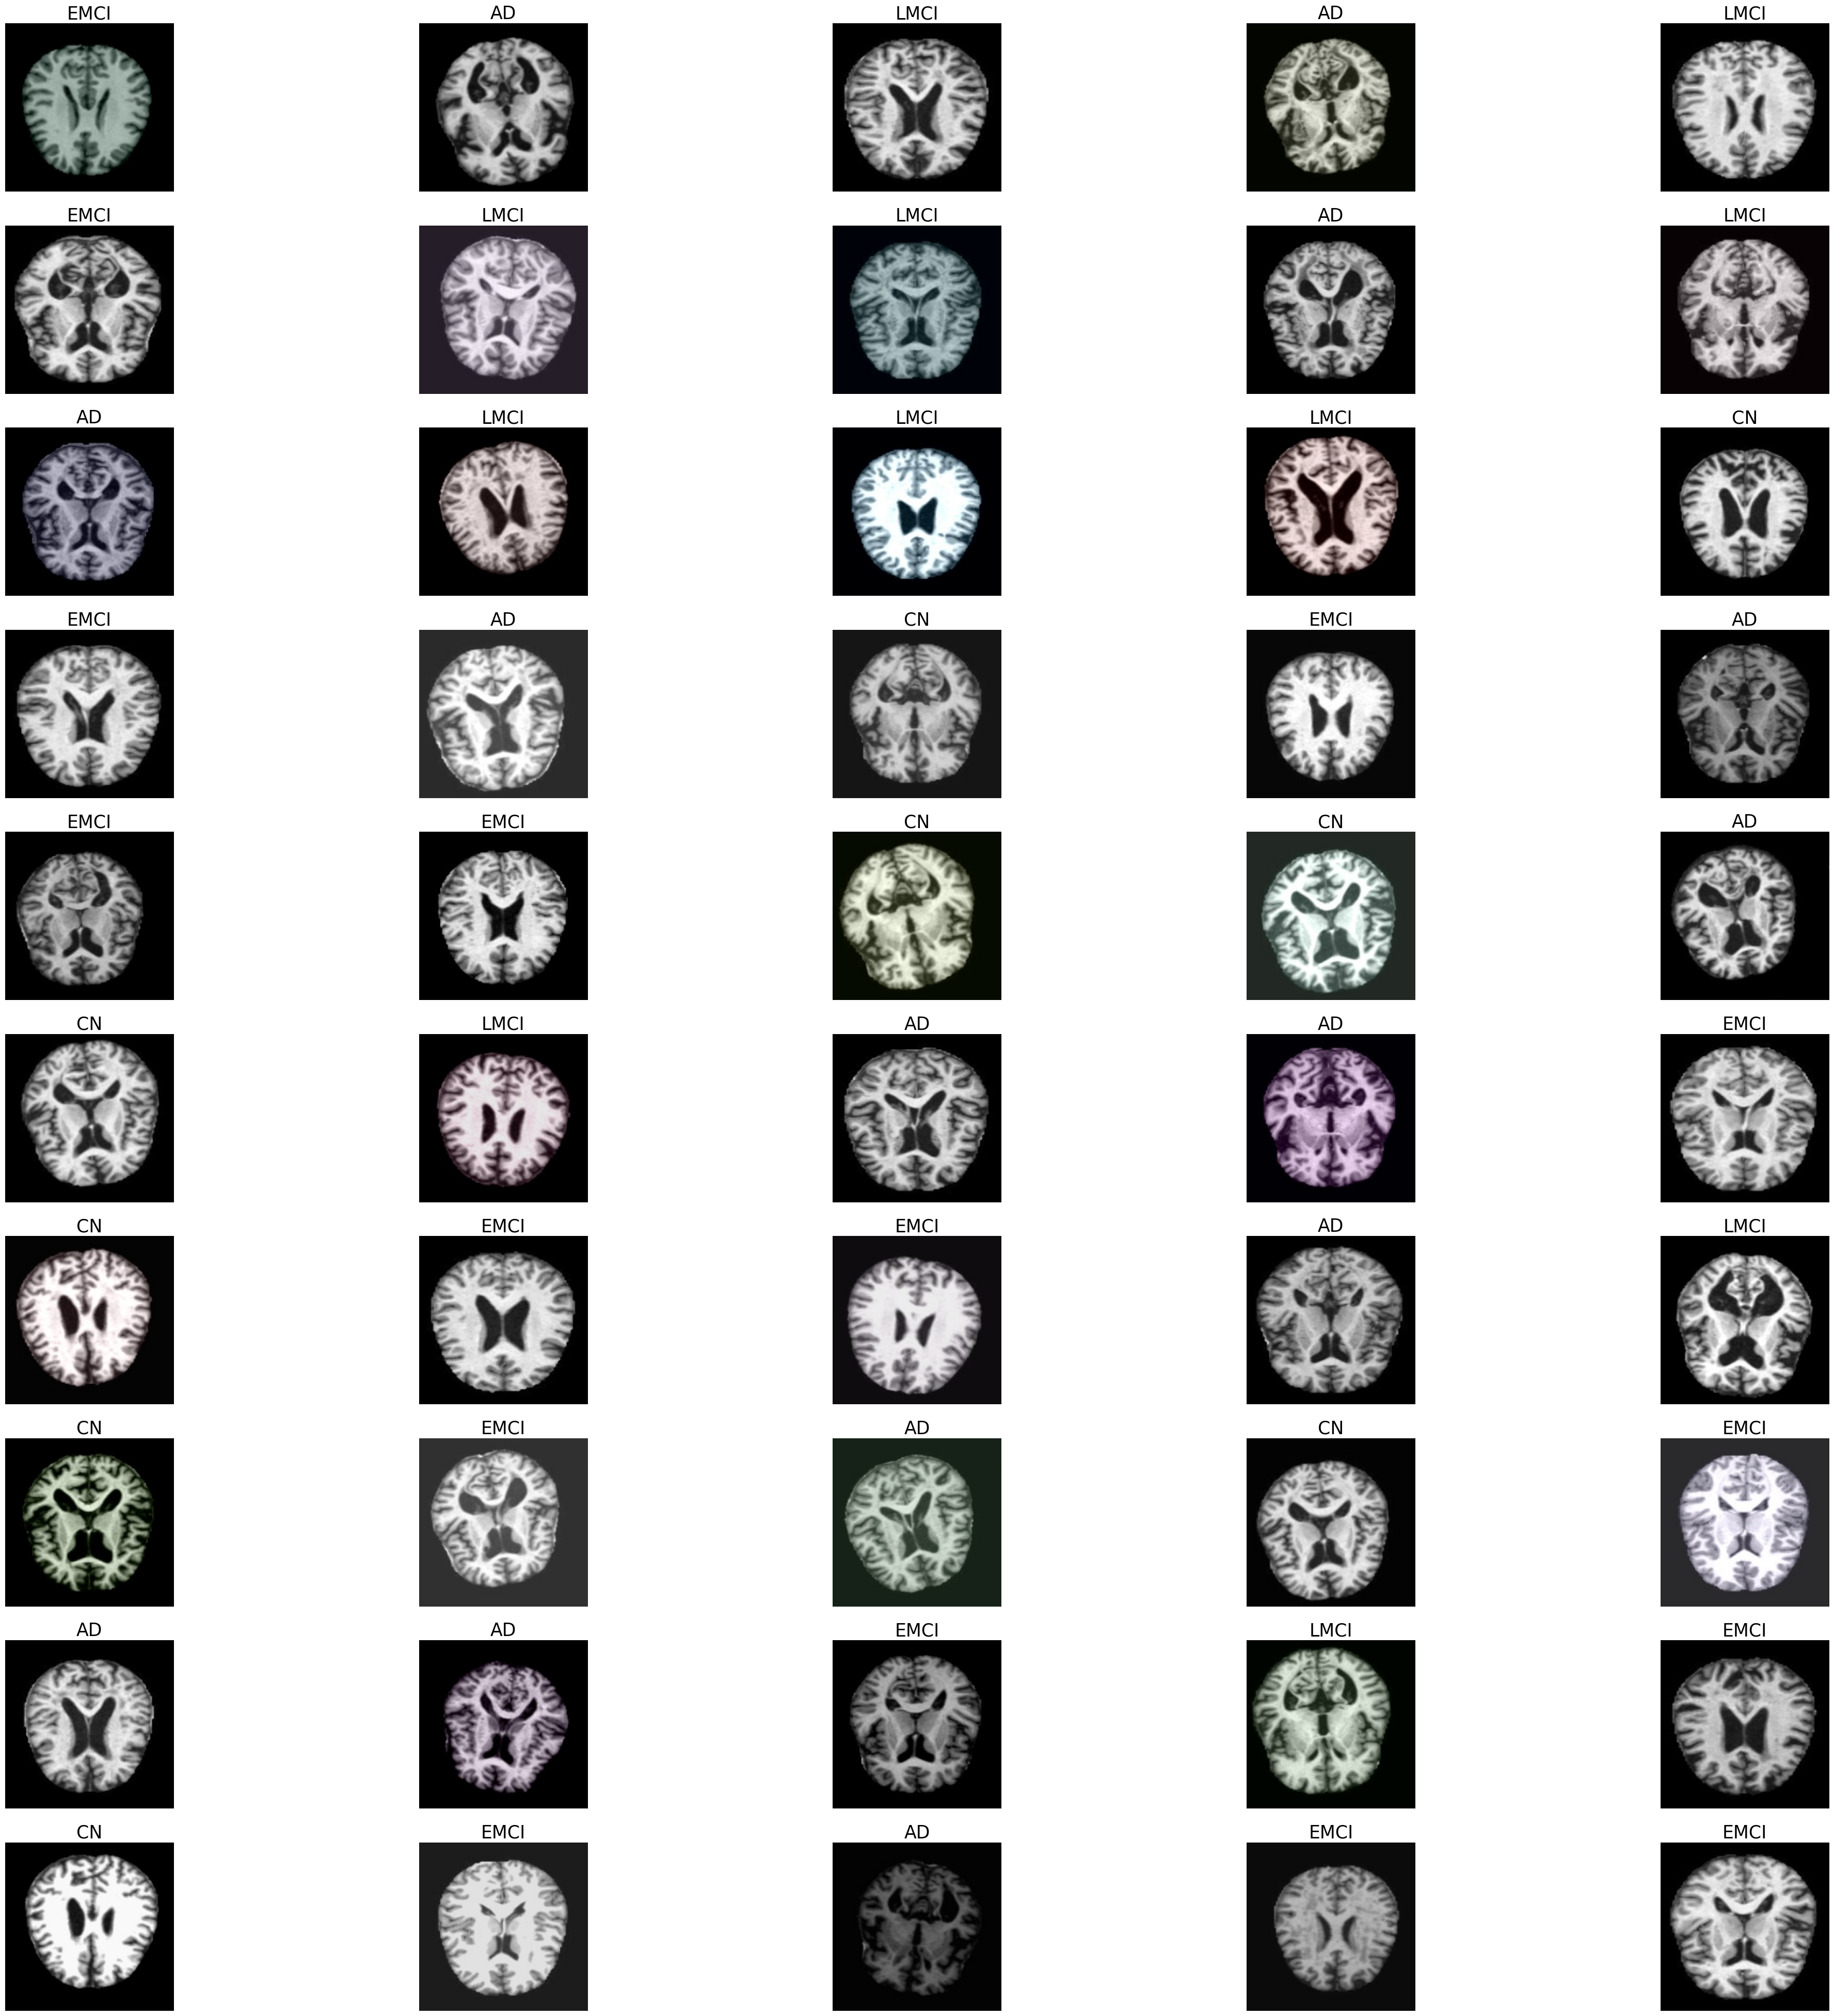

In [14]:
# Create a figure with a large size for displaying the images in a grid
plt.figure(figsize=(50,50))
# Loop over 50 random indices from the DataFrame `df` to display 50 images
for n, i in enumerate(np.random.randint(0, len(df), 50)):
    # Create a subplot in a 10x5 grid (10 rows, 5 columns) for each image
    plt.subplot(10, 5, n+1)
    # Read the image from the path specified in the DataFrame `df.image[i]`
    img = cv2.imread(df.image[i])
    # Resize the image to 224x224 pixels (standard input size for many models)
    img = cv2.resize(img, (224, 224))
    # Convert the image from BGR (OpenCV format) to RGB (for correct display with matplotlib)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Display the image in the current subplot
    plt.imshow(img)
    # Remove the axis labels (no need to show the axes for images)
    plt.axis('off')
    # Add the label (category) for the image from the DataFrame `df.label[i]` as the title
    plt.title(df.label[i], fontsize=25)

In [15]:
# Split the dataset into training (80%) and testing (20%) sets, ensuring that the split is stratified by the labels
X_train, X_test1, y_train, y_test1 = train_test_split(
    df['image'],  # Features (images)
    df['label'],  # Labels (categories)
    test_size=0.2,  # 20% of the data will be used for testing
    random_state=42,  # Fixing the random state for reproducibility
    shuffle=True,  # Shuffle the dataset before splitting
    stratify=df['label']  # Ensure the label distribution is the same in both train and test sets
)
# Further split the initial test set (X_test1) into validation (50%) and final test (50%) sets
X_val, X_test, y_val, y_test = train_test_split(
    X_test1,  # Features (images) from the initial test set
    y_test1,  # Labels (categories) from the initial test set
    test_size=0.5,  # 50% of the initial test set will be used for the final test set
    random_state=42,  # Fixing the random state for reproducibility
    shuffle=True,  # Shuffle the data before splitting
    stratify=y_test1  # Ensure the label distribution is the same in both validation and test sets
)
# Create a DataFrame for the training set with images and corresponding labels
df_train = pd.DataFrame({'image': X_train, 'label': y_train})
# Create a DataFrame for the final test set with images and corresponding labels
df_test = pd.DataFrame({'image': X_test, 'label': y_test})
# Create a DataFrame for the validation set with images and corresponding labels
df_val = pd.DataFrame({'image': X_val, 'label': y_val})

In [16]:
# Function to load image from file path
def load_image(file_path):
    img = cv2.imread(file_path)
    if img is not None:
        # Convert BGR to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [17]:
# Enhanced preprocessing function
def enhanced_preprocessing(image):
    # Standardization
    image = tf.cast(image, tf.float32)
    image = (image - tf.reduce_mean(image)) / tf.math.reduce_std(image)

    # Contrast Limited Adaptive Histogram Equalization (CLAHE)
    image = tf.image.adjust_contrast(image, 1.5)

    return image

I0000 00:00:1739430485.012977   26032 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1157 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4986945..2.839503].


Sample image path: /home/zuha/.cache/kagglehub/datasets/ahmedashrafahmed/fdata-adni-dataset/versions/1/AugmentedAlzheimerDataset/EMCI/36f999de-2732-4238-ae77-ee979b37e6db.jpg


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.3167965..2.745901].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.319578..3.3372564].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.3430933..3.1625733].


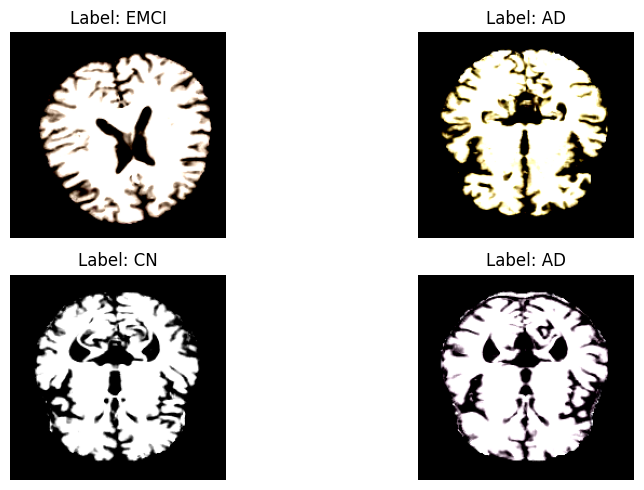

In [18]:
# Function to load and preprocess the image
def load_and_preprocess_image(file_path):
    img = load_image(file_path)
    if img is not None:
        img = enhanced_preprocessing(img)  # Apply enhanced preprocessing
    return img

# Let's verify the content of your image column
print("Sample image path:", df_test['image'].iloc[0])

# Now let's try to display some images after preprocessing
plt.figure(figsize=(10, 5))
for i in range(4):
    plt.subplot(2, 2, i + 1)
    img = load_and_preprocess_image(df_test['image'].iloc[i])  # Load and preprocess the image
    plt.imshow(img)
    plt.title(f"Label: {df_test['label'].iloc[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [19]:
def load_images(image_paths, target_size=(128, 128)):
    images = []
    for path in tqdm(image_paths, desc="Loading Images"):
        img = cv2.imread(path, cv2.IMREAD_COLOR)  # Read the image
        img = cv2.resize(img, target_size)       # Resize to fixed dimensions
        img = img.astype(np.float32) / 255.0     # Normalize pixel values
        images.append(img)
    return np.array(images)

# Load images
X_train_array = load_images(X_train)

Loading Images: 100%|███████████████████| 27187/27187 [00:05<00:00, 4903.98it/s]


In [20]:
import dask.array as da
import numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder

# Convert categorical labels to numeric
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# If X_train_array is already a Dask array, just rechunk it
X_train_array = da.from_array(X_train_array, chunks=(1000, 224, 224, 3))
y_train_encoded = da.from_array(y_train_encoded, chunks=(1000,))

# Compute the y_train_encoded array to get class counts
y_train_encoded_computed = y_train_encoded.compute()

# Find the minimum class count
unique_classes, class_counts = np.unique(y_train_encoded_computed, return_counts=True)
min_count = min(class_counts)  # Get the smallest class count

# Function to downsample in batches
def downsample_class(cls, X_train_array, y_train_encoded_computed):
    indices = np.where(y_train_encoded_computed == cls)[0]  # Get class indices
    X_cls = X_train_array[indices]  # Fetch only needed samples
    y_cls = y_train_encoded_computed[indices]

    # Downsample class
    X_downsampled, y_downsampled = resample(X_cls, y_cls,
                                            replace=False,
                                            n_samples=min_count,
                                            random_state=42)

    # Ensure downsampled data is a Dask array with proper chunks
    if not isinstance(X_downsampled, da.Array):
        X_downsampled = da.from_array(X_downsampled, chunks=(min_count, 224, 224, 3))
    else:
        X_downsampled = X_downsampled.rechunk((min_count, 224, 224, 3))

    return X_downsampled, da.from_array(y_downsampled, chunks=(min_count,))

# Process each class separately in chunks to avoid memory overload
X_balanced, y_balanced = [], []
for cls in unique_classes:
    X_downsampled, y_downsampled = downsample_class(cls, X_train_array, y_train_encoded_computed)
    X_balanced.append(X_downsampled)
    y_balanced.append(y_downsampled)

# Concatenate final dataset
X_train_final = da.concatenate(X_balanced, axis=0)
y_train_final = da.concatenate(y_balanced, axis=0)

print("Final dataset shape:", X_train_final.shape, y_train_final.shape)

Final dataset shape: (20684, 128, 128, 3) (20684,)


/tmp/ipykernel_26032/3220077406.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=unique_classes_final, y=class_counts_final, palette="Set1")


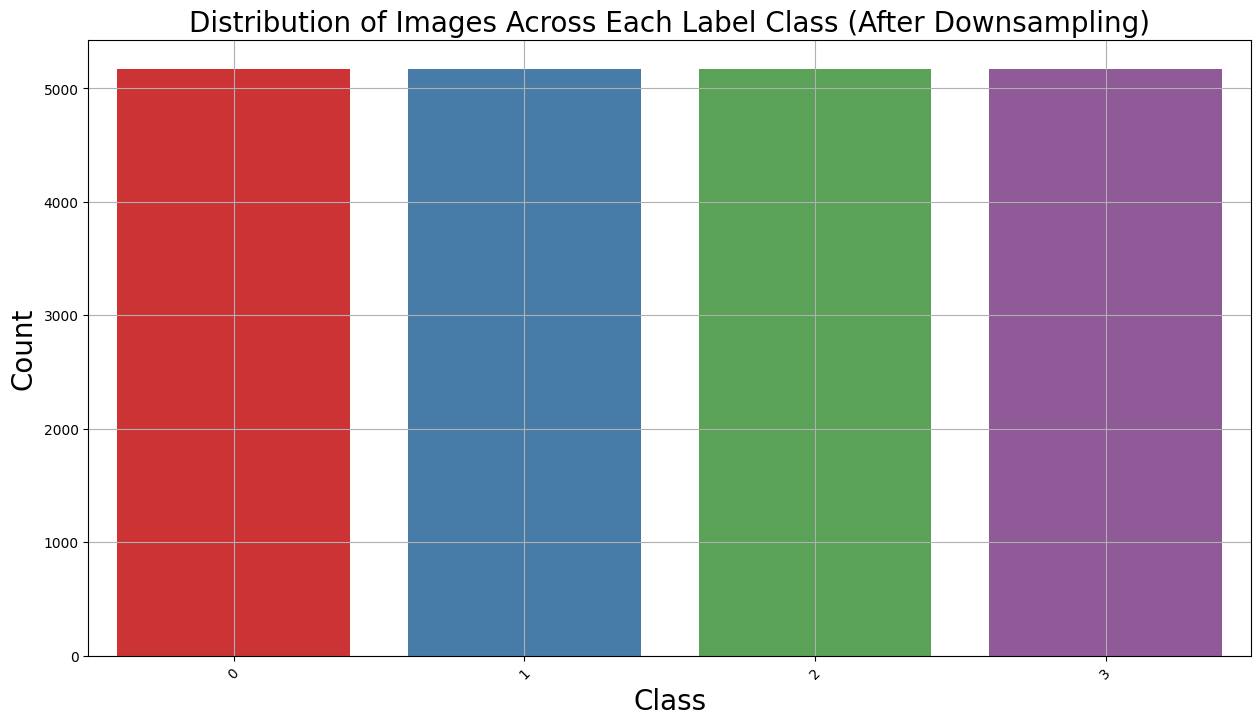

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute the final y_train_final array to get class counts
y_train_final_computed = y_train_final.compute()

# Get the counts of each class
unique_classes_final, class_counts_final = np.unique(y_train_final_computed, return_counts=True)

# Set the figure size for better visualization
plt.figure(figsize=(15, 8))

# Create a bar plot to visualize the number of samples per class
ax = sns.barplot(x=unique_classes_final, y=class_counts_final, palette="Set1")

# Set axis labels with increased font size for readability
ax.set_xlabel("Class", fontsize=20)
ax.set_ylabel("Count", fontsize=20)

# Set the title of the plot
plt.title("Distribution of Images Across Each Label Class (After Downsampling)", fontsize=20)

# Add grid lines to improve readability
plt.grid(True)

# Rotate x-axis labels to avoid overlap if class names are long
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [22]:
# Define the target image size and batch size for data processing
image_size = (224, 224)  # Resize all images to 224x224 pixels
batch_size = 32  # Number of images to process in each batch
# Initialize the ImageDataGenerator for data augmentation and preprocessing
# Updated data generator
datagen = ImageDataGenerator(
    preprocessing_function=enhanced_preprocessing,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
# Create the training data generator using the train DataFrame (`df_train`)
train_generator = datagen.flow_from_dataframe(
    df_train,  # DataFrame containing images and labels
    x_col='image',  # Column containing image paths
    y_col='label',  # Column containing labels
    target_size=image_size,  # Resize images to the target size
    batch_size=batch_size,  # Set the batch size
    class_mode='categorical',  # Set class mode to categorical for multi-class classification
    shuffle=True  # Shuffle the data for better training
)
# Create the test data generator using the test DataFrame (`df_test`)
test_generator = datagen.flow_from_dataframe(
    df_test,  # DataFrame containing images and labels
    x_col='image',  # Column containing image paths
    y_col='label',  # Column containing labels
    target_size=image_size,  # Resize images to the target size
    batch_size=batch_size,  # Set the batch size
    class_mode='categorical',  # Set class mode to categorical for multi-class classification
    shuffle=False  # Do not shuffle the test data to maintain consistency during evaluation
)
# Create the validation data generator using the validation DataFrame (`df_val`)
val_generator = datagen.flow_from_dataframe(
    df_val,  # DataFrame containing images and labels
    x_col='image',  # Column containing image paths
    y_col='label',  # Column containing labels
    target_size=image_size,  # Resize images to the target size
    batch_size=batch_size,  # Set the batch size
    class_mode='categorical',  # Set class mode to categorical for multi-class classification
    shuffle=True  # Shuffle the validation data for better validation performance
)

Found 27187 validated image filenames belonging to 4 classes.
Found 3399 validated image filenames belonging to 4 classes.
Found 3398 validated image filenames belonging to 4 classes.


In [23]:
# Retrieve the class labels from the train_generator's class_indices and store them as a list
class_num = list(train_generator.class_indices.keys())
# Display the class labels (names of the categories)
class_num

['AD', 'CN', 'EMCI', 'LMCI']

In [24]:
from tensorflow.keras.applications import EfficientNetB4
from tensorflow.keras.layers import (
    Dense, GlobalAveragePooling2D, Dropout, BatchNormalization,
    Layer, Add, Activation
)
from tensorflow.keras.models import Model
import tensorflow as tf

class AttentionModule(Layer):
    def __init__(self, **kwargs):
        super(AttentionModule, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(
            shape=(input_shape[-1], input_shape[-1]),  # (features, features)
            initializer='glorot_uniform',
            trainable=True
        )
        super(AttentionModule, self).build(input_shape)

    def call(self, x):
        # Compute attention scores
        attention = tf.matmul(x, self.W)  # (batch_size, features)
        attention = tf.nn.softmax(attention, axis=-1)  # Normalize across features

        # Apply attention weights
        return tf.multiply(x, attention)  # Element-wise multiplication

def create_optimized_model(input_shape=(224, 224, 3), num_classes=4):
    # Base model
    base_model = EfficientNetB4(
        weights='imagenet',
        include_top=False,
        input_shape=input_shape
    )

    # Freeze early layers
    for layer in base_model.layers[:-20]:
        layer.trainable = False

    # Add custom layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = AttentionModule()(x)  # Apply attention after pooling

    # First dense block
    x = Dense(1024)(x)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)
    x = Dropout(0.4)(x)

    # Second dense block with residual connection
    residual = x
    x = Dense(1024)(x)
    x = BatchNormalization()(x)
    x = Activation('swish')(x)
    x = Add()([x, residual])  # Adding residual connection
    x = Dropout(0.4)(x)

    # Output layer
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    return model

In [25]:
from tensorflow.keras.optimizers import AdamW
from tensorflow.keras.callbacks import (
    ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
)

# Create and compile model
model = create_optimized_model()
optimizer = AdamW(
    learning_rate=1e-4,
    weight_decay=1e-5
)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC()]
)

# Training callbacks
callbacks = [
    ReduceLROnPlateau(
        monitor='val_accuracy',
        factor=0.2,
        patience=3,
        min_lr=1e-6,
        verbose=1
    ),
    EarlyStopping(
        monitor='val_accuracy',
        patience=10,
        restore_best_weights=True,
        verbose=1
    ),
    ModelCheckpoint(
        'T_L_1.keras',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# Fit the model
hist = model.fit(
    train_generator,  # Replace with your training data
    epochs=50,
    batch_size=32,
    validation_data=val_generator,  # Replace with your validation data
    callbacks=callbacks
)

/home/zuha/miniconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50


I0000 00:00:1739430507.571029   40978 service.cc:148] XLA service 0x7c72b00016b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739430507.571043   40978 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2025-02-13 12:08:27.977386: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1739430509.567081   40978 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-02-13 12:08:31.532189: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_24278', 20 bytes spill stores, 20 bytes spill loads

2025-02-13 12:08:31.829576: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_24278_0', 76 b

  1/850 ━━━━━━━━━━━━━━━━━━━━ 6:11:55 26s/step - accuracy: 0.4688 - auc: 0.6413 - loss: 1.3591

I0000 00:00:1739430523.208335   40978 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


141/850 ━━━━━━━━━━━━━━━━━━━━ 2:21 199ms/step - accuracy: 0.3937 - auc: 0.6537 - loss: 1.2961

2025-02-13 12:09:15.010528: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_24278_0', 380 bytes spill stores, 436 bytes spill loads

2025-02-13 12:09:15.099384: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_24278', 20 bytes spill stores, 20 bytes spill loads

2025-02-13 12:09:15.194756: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_24278', 16 bytes spill stores, 16 bytes spill loads



850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step - accuracy: 0.4956 - auc: 0.7599 - loss: 1.1161
Epoch 1: val_accuracy improved from -inf to 0.67275, saving model to T_L_1.keras
850/850 ━━━━━━━━━━━━━━━━━━━━ 242s 254ms/step - accuracy: 0.4957 - auc: 0.7600 - loss: 1.1160 - val_accuracy: 0.6727 - val_auc: 0.9032 - val_loss: 0.7553 - learning_rate: 1.0000e-04
Epoch 2/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.6244 - auc: 0.8752 - loss: 0.8265
Epoch 2: val_accuracy improved from 0.67275 to 0.70954, saving model to T_L_1.keras
850/850 ━━━━━━━━━━━━━━━━━━━━ 191s 225ms/step - accuracy: 0.6244 - auc: 0.8752 - loss: 0.8265 - val_accuracy: 0.7095 - val_auc: 0.9197 - val_loss: 0.6717 - learning_rate: 1.0000e-04
Epoch 3/50
850/850 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.6684 - auc: 0.9008 - loss: 0.7413
Epoch 3: val_accuracy improved from 0.70954 to 0.74485, saving model to T_L_1.keras
850/850 ━━━━━━━━━━━━━━━━━━━━ 192s 225ms/step - accuracy: 0.6685 - auc: 0.9008 - loss: 0.7413 -

In [26]:
# Convert the training history (which includes metrics like loss and accuracy) into a Pandas DataFrame for easier analysis
hist_ = pd.DataFrame(hist.history)
# Display the DataFrame that contains the training and validation metrics for each epoch
hist_

accuracy       auc      loss  val_accuracy   val_auc  val_loss  \
0   0.553022  0.817311  0.995357      0.672749  0.903250  0.755331   
1   0.638393  0.882434  0.803985      0.709535  0.919747  0.671748   
2   0.673484  0.903062  0.731836      0.744850  0.939962  0.572173   
3   0.705153  0.918019  0.674548      0.750441  0.945468  0.546069   
4   0.727664  0.929465  0.627343      0.800765  0.961123  0.467665   
5   0.747122  0.938504  0.584755      0.811654  0.963749  0.448120   
6   0.762055  0.944377  0.557125      0.839317  0.973300  0.387284   
7   0.774010  0.950004  0.527306      0.840494  0.972486  0.388092   
8   0.790525  0.956288  0.494072      0.834903  0.974193  0.374038   
9   0.796226  0.958865  0.479454      0.843732  0.977800  0.349690   
10  0.811638  0.963519  0.451511      0.866392  0.981435  0.317486   
11  0.815169  0.965984  0.436484      0.863155  0.980562  0.326434   
12  0.826093  0.969260  0.414021      0.886404  0.986429  0.269364   
13  0.833229  0.970491  0.405692      0.899647  0.988079  0.255842   
14  0.837312  0.973114  0.385749      0.883461  0.985636  0.281356   
15  0.846324  0.975541  0.368184      0.900235  0.988781  0.242194   
16  0.852062  0.976109  0.364535      0.909358  0.991419  0.221815   
17  0.859197  0.978101  0.347820      0.912596  0.991401  0.214064   
18  0.864273  0.979806  0.334134      0.921424  0.991889  0.208411   
19  0.869864  0.981175  0.322202      0.918776  0.992071  0.203629   
20  0.869055  0.981849  0.316176      0.933196  0.994850  0.166040   
21  0.874609  0.983207  0.303716      0.930842  0.994583  0.167659   
22  0.879943  0.984299  0.293603      0.935256  0.995436  0.158953   
23  0.881487  0.984796  0.288509      0.935845  0.995424  0.156281   
24  0.887042  0.985300  0.282106      0.943790  0.995813  0.143048   
25  0.889506  0.986346  0.272752      0.945850  0.995523  0.152332   
26  0.893883  0.987134  0.263971      0.945850  0.995535  0.144947   
27  0.896348  0.987305  0.261671      0.950265  0.996738  0.132667   
28  0.897672  0.987788  0.256018      0.951736  0.997071  0.124637   
29  0.900798  0.988823  0.246897      0.946733  0.995824  0.138638   
30  0.906794  0.989344  0.239045      0.955856  0.997503  0.111710   
31  0.902453  0.989221  0.239864      0.959682  0.997554  0.110983   
32  0.908081  0.990128  0.230574      0.963214  0.997983  0.097024   
33  0.910141  0.990699  0.223900      0.955268  0.997303  0.116310   
34  0.912495  0.990789  0.222765      0.953502  0.996539  0.120759   
35  0.914003  0.991024  0.217733      0.954385  0.997141  0.115339   
36  0.922720  0.993023  0.192796      0.968511  0.998386  0.083199   
37  0.928164  0.993619  0.184402      0.974985  0.999106  0.070368   
38  0.929709  0.994307  0.175432      0.970277  0.998707  0.078668   
39  0.933865  0.994843  0.166583      0.976751  0.999249  0.063885   
40  0.935888  0.994927  0.163031      0.972042  0.999029  0.071100   
41  0.934895  0.994899  0.163091      0.972042  0.998895  0.071179   
42  0.935888  0.994943  0.162507      0.976457  0.999201  0.061718   
43  0.937323  0.995356  0.156773      0.975574  0.999295  0.061643   
44  0.937875  0.995329  0.155993      0.977045  0.999360  0.059371   
45  0.939751  0.995501  0.153601      0.974985  0.999239  0.063537   
46  0.939861  0.995492  0.152458      0.978517  0.999276  0.062885   
47  0.941479  0.995800  0.148776      0.977340  0.999074  0.062933   
48  0.941626  0.995555  0.151219      0.977634  0.999112  0.061964   
49  0.941994  0.995517  0.151531      0.976162  0.999351  0.060124   

    learning_rate  
0        0.000100  
1        0.000100  
2        0.000100  
3        0.000100  
4        0.000100  
5        0.000100  
6        0.000100  
7        0.000100  
8        0.000100  
9        0.000100  
10       0.000100  
11       0.000100  
12       0.000100  
13       0.000100  
14       0.000100  
15       0.000100  
16       0.000100  
17       0.000100  
18       0.000100  
19       0.000100  
20       0.00

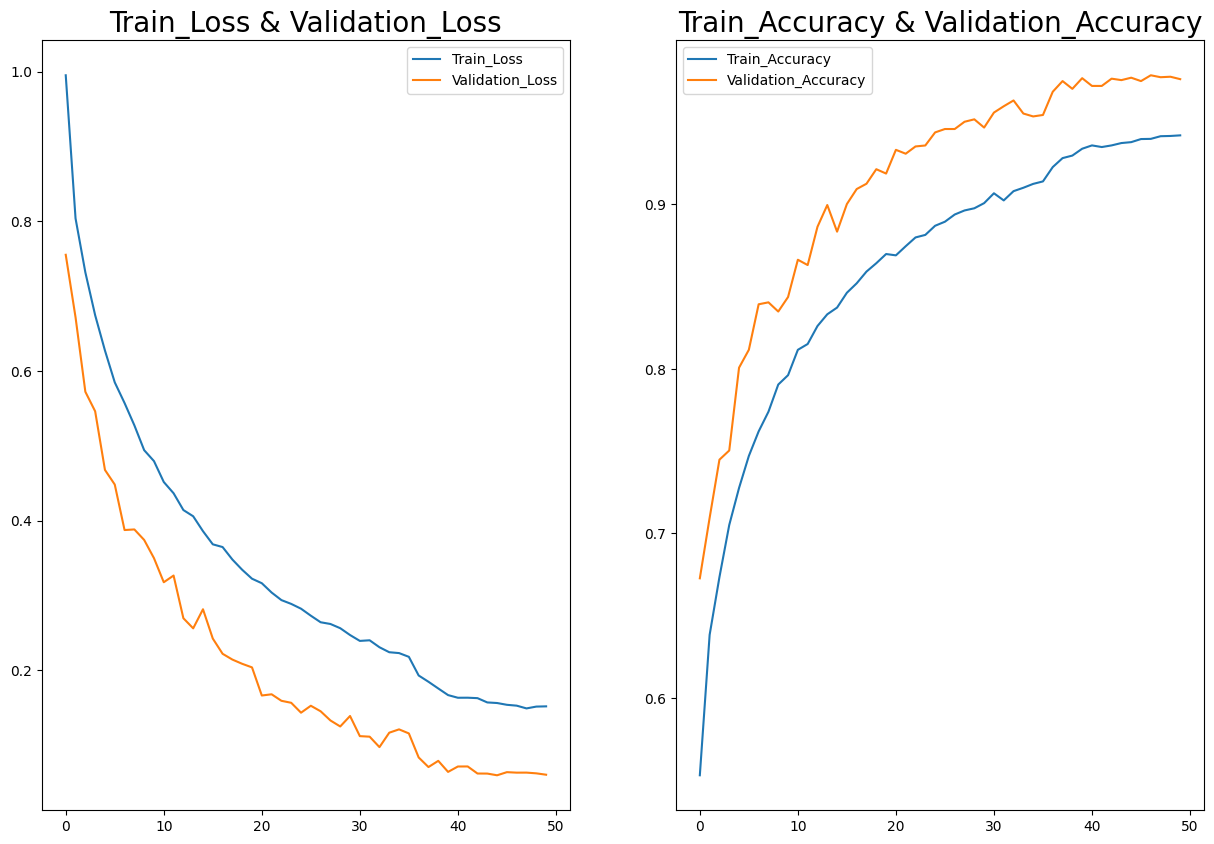

In [27]:
# Create a figure with a specific size for the plots
plt.figure(figsize=(15, 10))
# Create the first subplot (1 row, 2 columns, first subplot)
plt.subplot(1, 2, 1)
# Plot the training loss vs. validation loss
plt.plot(hist_['loss'], label='Train_Loss')  # Training loss
plt.plot(hist_['val_loss'], label='Validation_Loss')  # Validation loss
# Set the title for the plot
plt.title('Train_Loss & Validation_Loss', fontsize=20)
# Add a legend to distinguish between the training and validation loss
plt.legend()
# Create the second subplot (1 row, 2 columns, second subplot)
plt.subplot(1, 2, 2)
# Plot the training accuracy vs. validation accuracy
plt.plot(hist_['accuracy'], label='Train_Accuracy')  # Training accuracy
plt.plot(hist_['val_accuracy'], label='Validation_Accuracy')  # Validation accuracy
# Set the title for the plot
plt.title('Train_Accuracy & Validation_Accuracy', fontsize=20)
# Add a legend to distinguish between the training and validation accuracy
plt.legend()
# Display the plots
plt.show()

In [29]:
# Evaluate the model on the test dataset
results = model.evaluate(test_generator)

# Print all evaluation metrics
print("Evaluation Results:", results)

# Unpack dynamically based on the number of returned values
if len(results) == 2:
    score, acc = results
    print('Test Loss =', score)
    print('Test Accuracy =', acc)
else:
    print("Test Metrics:", results)  # Print all returned metrics

107/107 ━━━━━━━━━━━━━━━━━━━━ 20s 190ms/step - accuracy: 0.9780 - auc: 0.9992 - loss: 0.0558
Evaluation Results: [0.059827741235494614, 0.9785230755805969, 0.9991285800933838]
Test Metrics: [0.059827741235494614, 0.9785230755805969, 0.9991285800933838]


In [30]:
y_test =test_generator.classes
predictions = model.predict(test_generator)
y_pred = np.argmax(predictions,axis=1)
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})
df

107/107 ━━━━━━━━━━━━━━━━━━━━ 29s 233ms/step


Actual  Prediction
0          2           2
1          0           0
2          1           1
3          0           0
4          1           1
...      ...         ...
3394       2           2
3395       1           1
3396       2           2
3397       2           2
3398       2           2

[3399 rows x 2 columns]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.3056456..2.9648738].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.212419..2.8994052].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.3811556..3.2365634].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.1579354..3.494018].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.9239212..4.3672395].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.1390122..3.1077092].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4849327.

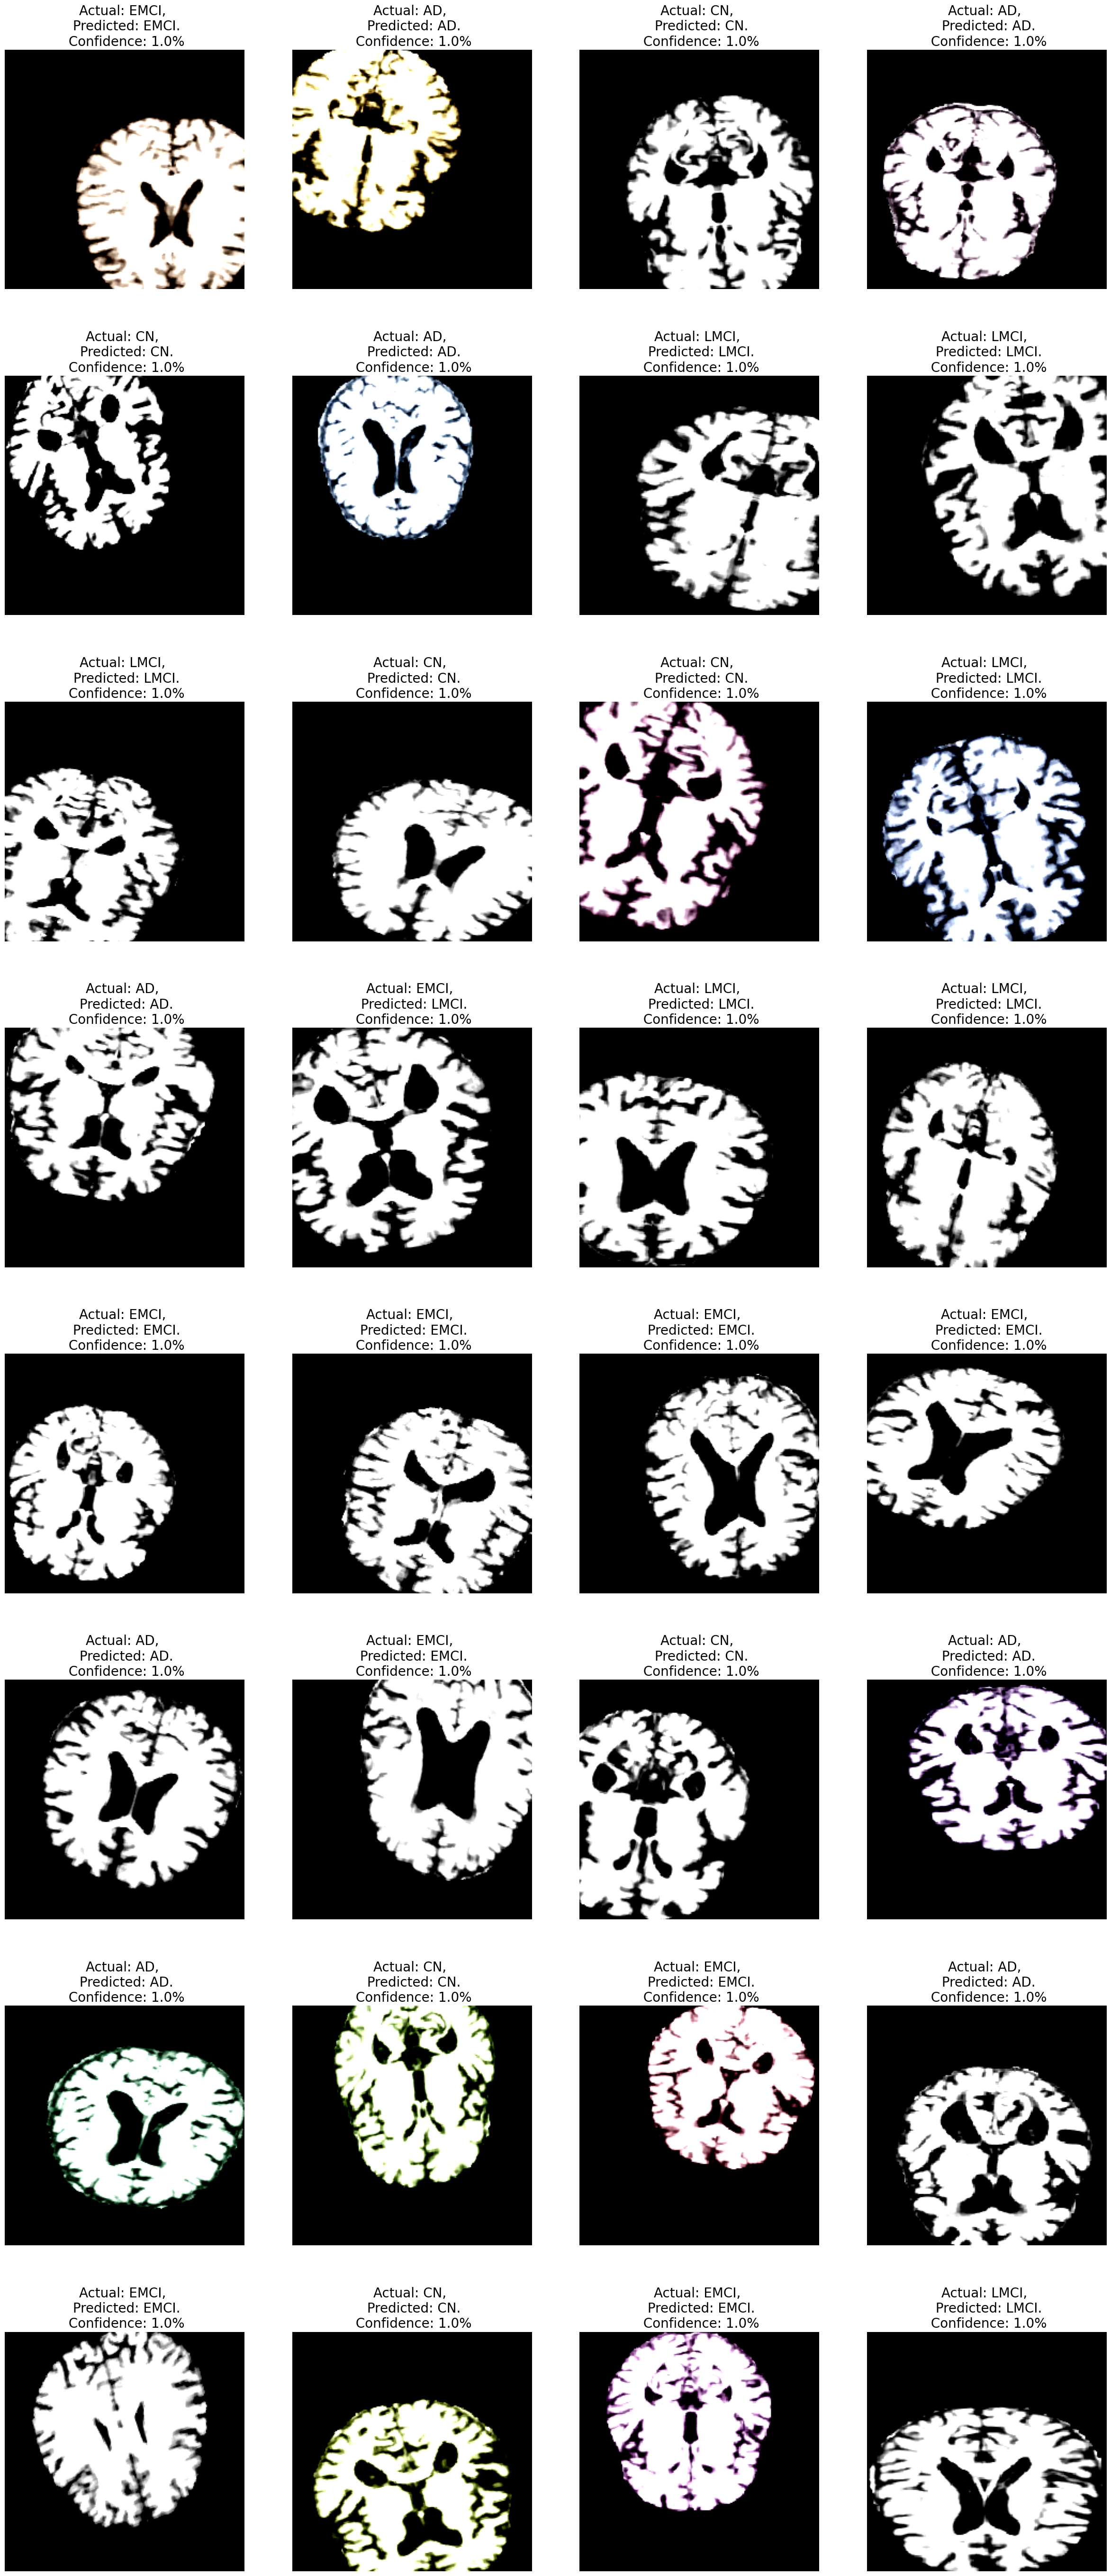

In [31]:
plt.figure(figsize=(30,70))
batch = next(test_generator)
images= batch[0]
for n in range(32):
    plt.subplot(8,4,n+1)
    plt.imshow(images[n])
    plt.axis('off')
    plt.title(f"Actual: {class_num[y_test[n]]}, \n Predicted: {class_num[y_pred[n]]}.\n Confidence: {round(predictions[n][np.argmax(predictions[n])],0)}%",fontsize=20)

array([[891,   0,   3,   2],
       [  0, 647,   0,   0],
       [  6,   0, 915,  39],
       [ 11,   0,  21, 864]])

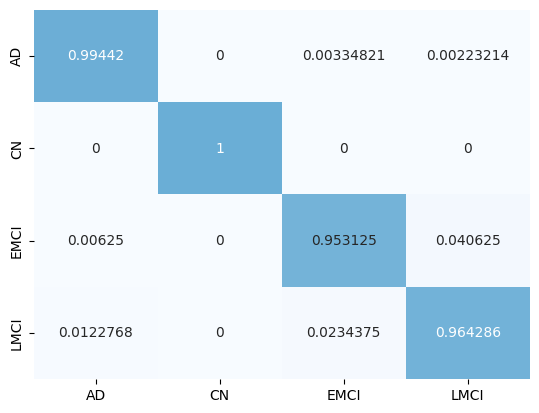

In [32]:
# Calculate the confusion matrix between the true labels (y_test) and predicted labels (y_pred)
CM = confusion_matrix(y_test, y_pred)
# Convert the confusion matrix into percentages for better readability
# CM.astype('float') converts the integer counts to floats, and then divides each row by the sum of that row (axis=1)
CM_percent = CM.astype('float') / CM.sum(axis=1)[:, np.newaxis]
# Create a heatmap to visualize the confusion matrix as a percentage
# `fmt='g'` means the numbers will be displayed as general format (i.e., no scientific notation)
# `center=True` centers the color map, so values around 0.5 will be in the middle of the color scale
# `cbar=False` disables the color bar for the heatmap
# `annot=True` enables annotations (numbers) to be displayed on the heatmap cells
# `cmap='Blues'` sets the color map to shades of blue
# `xticklabels` and `yticklabels` display the class names on the x and y axes
sns.heatmap(CM_percent, fmt='g', center=True, cbar=False, annot=True, cmap='Blues', xticklabels=class_num, yticklabels=class_num)
# Display the confusion matrix as raw counts (without percentages)
CM

In [33]:
# Generate a classification report that includes precision, recall, F1-score, and support for each class
# `y_test` contains the true labels, `y_pred` contains the predicted labels, and `target_names` corresponds to the class names.
ClassificationReport = classification_report(y_test, y_pred, target_names=class_num)
# Print the classification report
print('Classification Report is : ', ClassificationReport)

Classification Report is :                precision    recall  f1-score   support

          AD       0.98      0.99      0.99       896
          CN       1.00      1.00      1.00       647
        EMCI       0.97      0.95      0.96       960
        LMCI       0.95      0.96      0.96       896

    accuracy                           0.98      3399
   macro avg       0.98      0.98      0.98      3399
weighted avg       0.98      0.98      0.98      3399

